# SVM for Facial Matching. #

Doing Support Vector Machine (SVM) regression on a subset of Cropped Yale face data. Data consists 
of 39 subjects, each with 65 greyscale images taken under different lighting conditions, then cropped
to 192 x 168 pixels.

My program assumes all the face images are 192 x 168. There is an image of size 640 x 480 pixels in each folder. Modified my program to exclude this "ambient" image.

You can download the data set here:
http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html


---
Importing libraries and going into the */CroppedYale* directory:

In [1]:
import os
import glob
#change into the CroppedYale directory
os.chdir('CroppedYale')

Loading a few image files just to see what they look like.

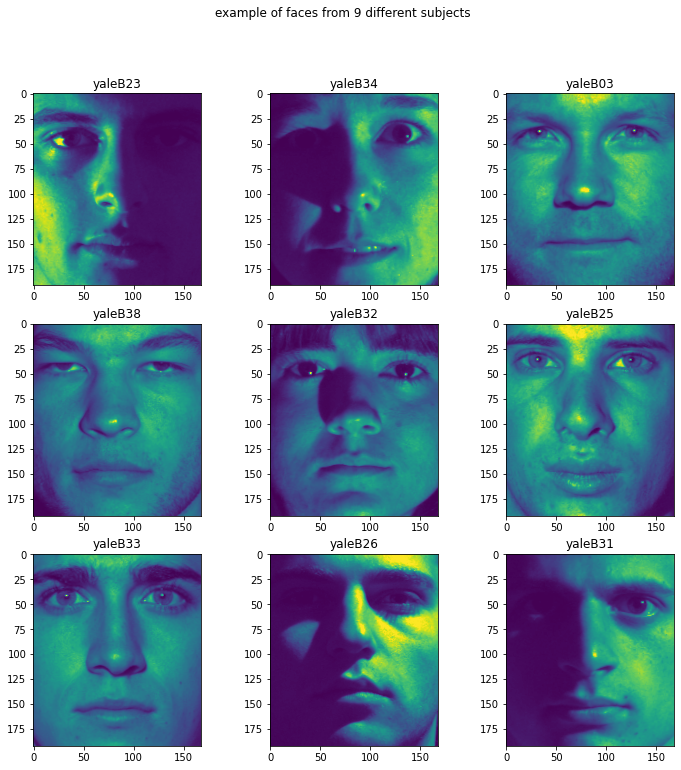

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#listing all the subdirectories in CroppedYale
subdir = os.listdir()

filename = []
image = []
target_name = []

#length of the array
PJG = 192*168


examples = glob.glob(subdir[0]+'/*.pgm')[19]
examples

k=0
plt.figure(figsize=(12,12))
for i in subdir[0:9]:
    f = plt.imread(glob.glob(i+'/*.pgm')[19])
    plt.suptitle('example of faces from 9 different subjects')
    plt.subplot(331 + k).set_title(i)
    plt.imshow(f)
    k+=1
plt.show()
    

Loading up the data files into a suitable array. See the code comments.

In [3]:
k=0
#for each subdirectory
for i in subdir:
    #listing all the pgm filenames in each subdirectory
    s = glob.glob(i +'/*.pgm')
    #pick a filename in the list of filenames
    for file in s:
        #read an image using a filename
        img = plt.imread(file)
        #exclude the bloody "ambient" image. Only process the 192x168 images!
        if np.shape(img)== (192,168):
            #append the filename to a lsit of filenames. Seems we don't actually use them though
            filename += [file]
            #append the subdir name to a list of subdir names. This will be the training target
            target_name += [i]
            #append image to a list of images
            image += [img]
            #flatten image to 1D and append the flattened image to a data array.
            #sklearn only uses data like that
            if k == 0:
                #create array during the first iteration
                data = np.array( [img.flatten()] )
                k =1
            else:
                #append flattened image to already created data array
                data = np.append(data, [img.flatten()], axis =0)    
                
            
            
            
        
print(np.shape(data))

(2424, 32256)


In [4]:
np.shape(target_name), np.shape(data)

((2424,), (2424, 32256))

Sklearn's support vector machine library.

*train_test_split* is a function that splits your data and targets into:
- data and targets used for training
- data and targets used for testing




In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split

Split the data sets: 
- 25% of data used for training, as *train_data*
- 25% of target_name for training as *train_target_name*
- 75% of data used for testing, as *test_data*
- 75% of target_name for testing as *test_target_name*



In [6]:
test_size = 0.75
train_data, test_data, train_target_name, test_target_name = train_test_split(
    data, target_name, test_size = test_size, shuffle =True)


test_length = np.shape(test_data)[0]
print(test_length)
np.shape(train_data), np.shape(test_data)

1818


((606, 32256), (1818, 32256))

Creating a support vector machine called *mesin* and training it using the *train_data* and *train_target_name*.

We use the linear SVM. Previously tried polynomial kernel and radial basis RBG kernel, but surprisingly linear was the best.

- Polynomial -> 60% to 70% correct results, with 99% data set used for training, and 1 percent for testing.

- Radial basis -> 0% correct results no matter how I tweaked. It also took much longer to train!

- Linear -> 80% accuracy with only 25% of data sets used for training, and it gets better with more training data sets! 92% accuracy with 90% of data used for training.

### Linear:

mesin = svm.SVC(kernel = 'linear', C = 10)

### Polynomial:
mesin = svm.SVC(kernel = 'poly', C = 10)

### Radial Basis:
mesin = svm.SVC(kernel = 'rbf', gamma = 0.1, C = 10)


In [7]:
mesin = svm.SVC(kernel='linear')
mesin.fit(train_data, train_target_name)


SVC(kernel='linear')

After training the *mesin*, try it out using the *test_data*. It will return a list of directory names *ramal* which the machine thinks each row of *test_data* belongs to.

For example, *test_data[25]* matches to *yaleB24*.

In [8]:

ramal = mesin.predict(test_data)

List the folder names predicted by the SVM vs correct answer. 

Calculate percentage of predicted == correct answer

In [9]:
true_count = 0
for i in range(test_length): 
    if i%int(100) ==0:
        print(ramal[i], test_target_name[i], ramal[i]==test_target_name[i])
    if ramal[i]==test_target_name[i]:
        true_count += 1

print('Accuracy =',100*true_count/test_length)

yaleB09 yaleB09 True
yaleB24 yaleB24 True
yaleB08 yaleB08 True
yaleB12 yaleB12 True
yaleB33 yaleB33 True
yaleB34 yaleB34 True
yaleB30 yaleB30 True
yaleB09 yaleB08 False
yaleB17 yaleB17 True
yaleB31 yaleB31 True
yaleB21 yaleB21 True
yaleB20 yaleB20 True
yaleB36 yaleB36 True
yaleB11 yaleB11 True
yaleB16 yaleB16 True
yaleB33 yaleB33 True
yaleB15 yaleB15 True
yaleB15 yaleB15 True
yaleB39 yaleB39 True
Accuracy = 80.96809680968097


List the images, what folder the mesin predicted vs a representative of the folder

0


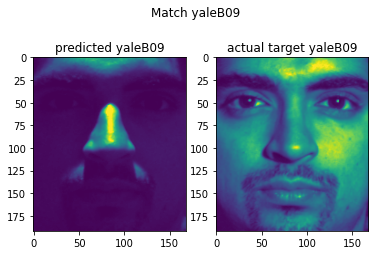

72


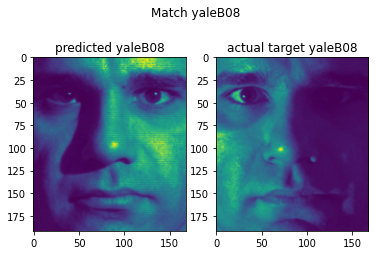

144


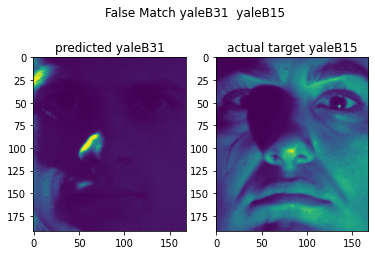

216


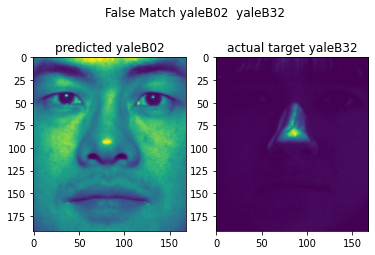

288


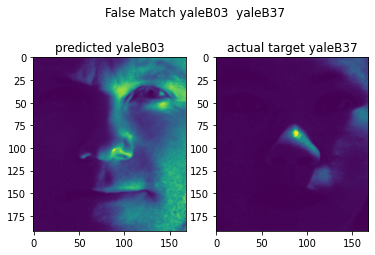

360


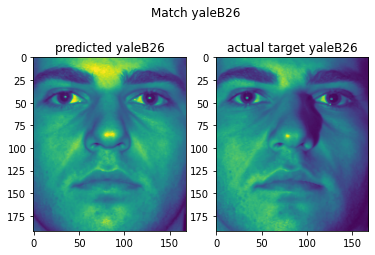

432


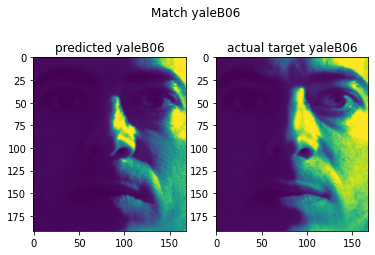

504


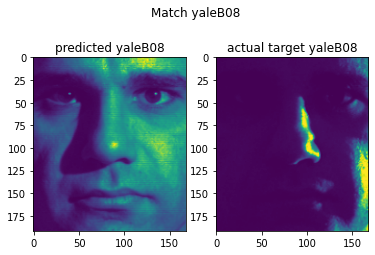

576


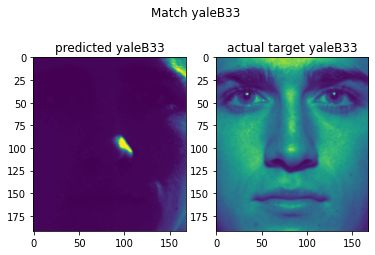

648


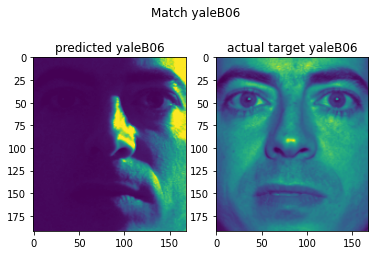

720


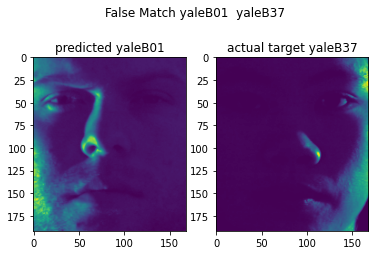

792


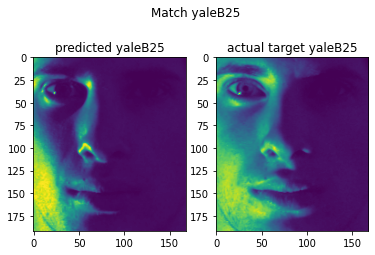

864


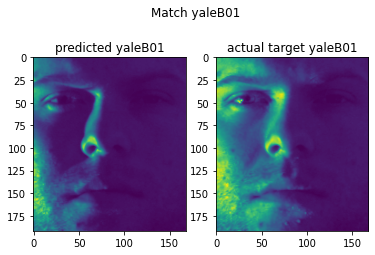

936


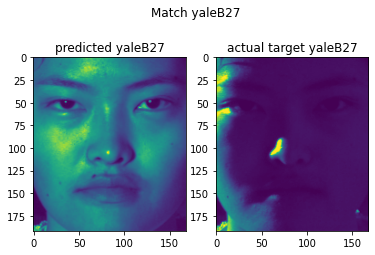

1008


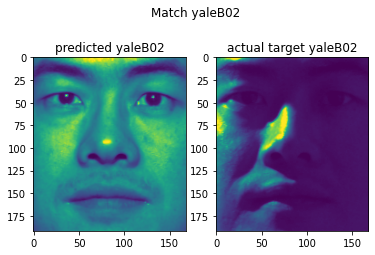

1080


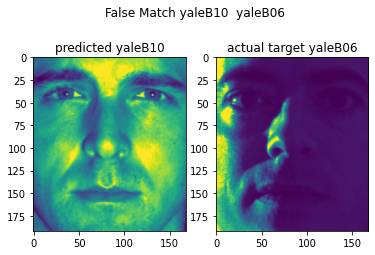

1152


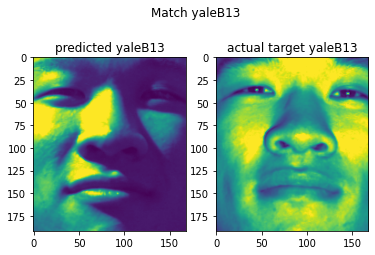

1224


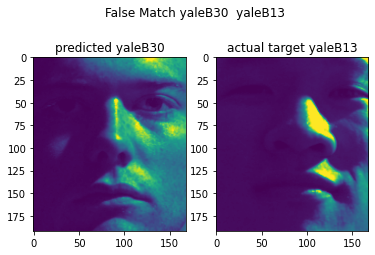

1296


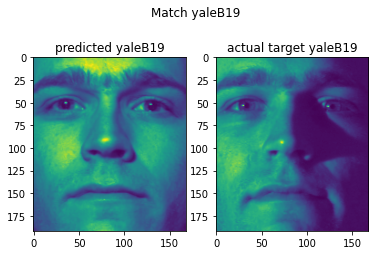

1368


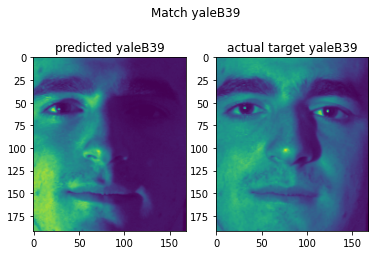

1440


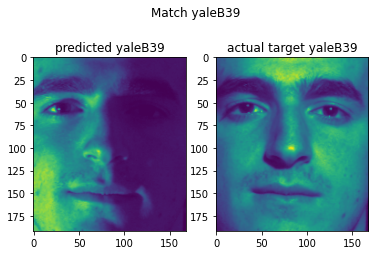

1512


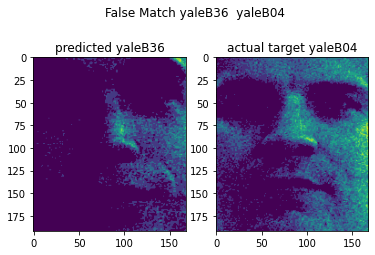

1584


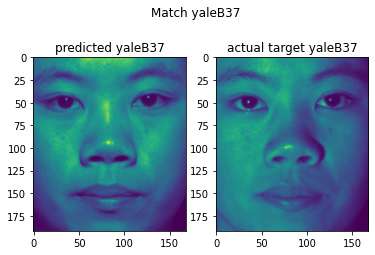

1656


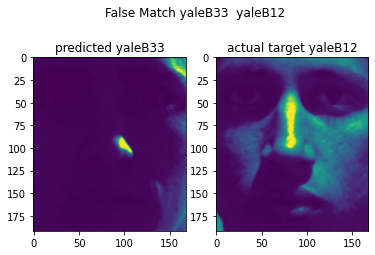

1728


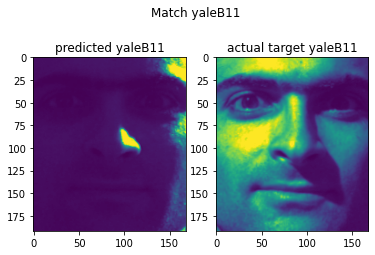

1800


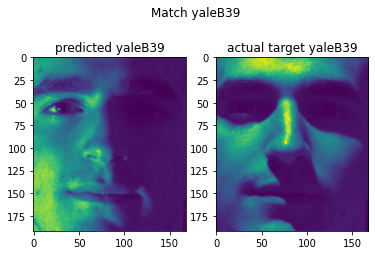

In [10]:
%matplotlib inline
for i in range(test_length):
    
    if i%int(test_length/25) ==0:
        
        img_predict = plt.imread((glob.glob(ramal[i] + '/*.pgm'))[10])
        
        
        fig = plt.figure()
        
        if ramal[i] == test_target_name[i]:
            fig.suptitle("Match "+ramal[i])
        else:
            fig.suptitle("False Match "+ramal[i]+ "  " +test_target_name[i])
            
        
        plt.subplot(121).set_title('predicted '+ ramal[i])
        plt.imshow(img_predict)
        
        plt.subplot(122).set_title('actual target '+ test_target_name[i])
        plt.imshow(test_data[i].reshape((192,168)))
        s = test_target_name
        
        print(i)
        plt.show()

In [11]:
int(25/10)

2

In [12]:
test_length

1818